# Lab: Predicting type of cloth using Convolutional Neural Network (CNN)

Fashion MNIST is a drop in replacement for MNIST!

## About Fashion mnist

Fashion-MNIST is a dataset of Zalando’s article images — consisting of a training set of 60,000 examples and a test set of 10,000 examples. Each example is a 28x28 grayscale image, associated with a label from 10 classes.

In other words, we have 70,000 images of 28 pixels width and 28 pixels height in greyscale. Each image is showing one of 10 possible clothing types. 

Here is one:

<img src="https://elephantscale-public.s3.amazonaws.com/media/machine-learning/fashion-mnist-1.png">

Here are some images from the dataset along with the clothing they are showing:

<img src="https://elephantscale-public.s3.amazonaws.com/media/machine-learning/fashion-mnist-1.png">

Here are all different types of clothing:



| Label | Description |
|-------|-------------|
| 0     | T-shirt/top |
| 1     | Trouser     |
| 2     | Pullover    |
| 3     | Dress       |
| 4     | Coat        |
| 5     | Sandal      |
| 6     | Shirt       |
| 7     | Sneaker     |
| 8     | Bag         |
| 9     | Ankle boot  |

In [1]:
## Determine if we are running on google colab

try:
    import google.colab
    RUNNING_IN_COLAB = True
except:
    RUNNING_IN_COLAB = False

print ("Running in Google COLAB : ", RUNNING_IN_COLAB)


Running in Google COLAB :  False


In [2]:
try:
  # %tensorflow_version only exists in Colab.
  %tensorflow_version 2.x
except Exception:
  pass

import tensorflow as tf
from tensorflow import keras

## Step 1: Download data

In [3]:
(train_images, train_labels), (test_images, test_labels) = keras.datasets.fashion_mnist.load_data()

# backup
(train_images2, train_labels2), (test_images2, test_labels2) = keras.datasets.fashion_mnist.load_data()

print("train_images shape : ", train_images.shape)
print("train_labels shape : ", train_labels.shape)
print("test_images shape : ", test_images.shape)
print("test_labels shape : ", test_labels.shape)

train_images shape :  (60000, 28, 28)
train_labels shape :  (60000,)
test_images shape :  (10000, 28, 28)
test_labels shape :  (10000,)


## Step 2 : Data Exploration

Displaying train index =  43774
train label [43774] = 1 
------------ raw data for train_image[43774] -------
[[  0   0   0   0   0   0   0   0   0   0 106 124 122 129 140 143 131 174
  107   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0 255 255 255 255 255 255 255 255
  255   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0  14 255 245 241 241 238 240 238 242
  255   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0  33 255 243 251 250 247 246 248 242
  255  21   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0 103 255 240 248 248 247 246 245 241
  255 100   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0 158 255 240 248 248 248 246 246 239
  255 141   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0 182 255 241 249 248 253 248 246 239
  255 169   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0 179 255 237 243 254 252 255 246 2

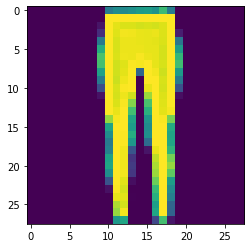

In [4]:
## Run this cell a few times to randomly display some digit data
%matplotlib inline
import matplotlib.pyplot as plt
import random

index = random.randint(0, len(train_images))
# index = 100
print ("Displaying train index = ", index)

print("train label [{}] = {} ".format(index, train_labels[index]))
print ("------------ raw data for train_image[{}] -------".format(index))
print(train_images[index])
print ("--------------------")

plt.imshow(train_images[index])
plt.show()

## Step 3: Shape data

In [5]:
train_images  = train_images / 255.0
test_images = test_images / 255.0

## Step 4: Create model

### TODO : Sketch the neural net
- What is the input dimensions
- how many neurons in layers
- how many output neurons

<img src="../assets/images/neural-net-unknown.png" style="width:30%"/>

In [6]:
## Model 1

model = tf.keras.models.Sequential([
            tf.keras.layers.Flatten(input_shape=(28, 28)),
            tf.keras.layers.Dense(128, activation=tf.nn.relu), 
            tf.keras.layers.Dense(10, activation=tf.nn.softmax)
            ])


model.compile(
  optimizer=tf.keras.optimizers.Adam(),  # 'adam'
  loss='sparse_categorical_crossentropy',
  metrics=['accuracy'])

print (model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________
None


## Step 5 - Setup Tensorboard

In [8]:
## This is fairly boiler plate code

import datetime
import os
import shutil

app_name = 'fashion-mnist'

# timestamp  = datetime.datetime.now().strftime("%Y-%m-%d--%H-%M-%S")

tb_top_level_dir= '/tmp/tensorboard-logs'

tb_app_dir = os.path.join (tb_top_level_dir, app_name)

tb_logs_dir = os.path.join (tb_app_dir, datetime.datetime.now().strftime("%H-%M-%S"))


print ("Saving TB logs to : " , tb_logs_dir)

#clear out old logs
shutil.rmtree ( tb_app_dir, ignore_errors=True )

tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=tb_logs_dir, write_graph=True, 
                                                      write_images=True, histogram_freq=1)
## This will embed Tensorboard right here in jupyter!
%load_ext tensorboard
%tensorboard --logdir $tb_logs_dir

Saving TB logs to :  /tmp/tensorboard-logs/fashion-mnist/18-44-33


## Step 6: Training the model


In [ ]:
%%time

epochs=10
print ("training starting ...")

history = model.fit(
    train_images,
    train_labels,
    epochs=epochs,
    validation_split=0.2,
    verbose=1,
    callbacks=[tensorboard_callback]
)

print ("training done.")

training starting ...
Epoch 1/10
1500/1500 [==============================] - 11s 7ms/step - loss: 0.5124 - accuracy: 0.8222 - val_loss: 0.4311 - val_accuracy: 0.8446
Epoch 2/10
1500/1500 [==============================] - 12s 8ms/step - loss: 0.3855 - accuracy: 0.8618 - val_loss: 0.3574 - val_accuracy: 0.8702
Epoch 3/10
1500/1500 [==============================] - 13s 8ms/step - loss: 0.3413 - accuracy: 0.8762 - val_loss: 0.3637 - val_accuracy: 0.8680
Epoch 4/10
1500/1500 [==============================] - 15s 10ms/step - loss: 0.3176 - accuracy: 0.8843 - val_loss: 0.3470 - val_accuracy: 0.8754
Epoch 5/10
1500/1500 [==============================] - 9s 6ms/step - loss: 0.2983 - accuracy: 0.8890 - val_loss: 0.3321 - val_accuracy: 0.8804
Epoch 6/10
1500/1500 [==============================] - 9s 6ms/step - loss: 0.2795 - accuracy: 0.8957 - val_loss: 0.3532 - val_accuracy: 0.8752
Epoch 7/10
1500/1500 [==============================] - 8s 5ms/step - loss: 0.2700 - accuracy: 0.9006 - val_l

## Step 7 : See Training History

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='train_accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.legend()
plt.show()

## Step 8 - Predict

**==> Compare prediction time vs training time.  Prediction is very quick!**

In [ ]:
%%time 

print ("predicting on {:,} images".format(len(test_images)))
predictions = model.predict(test_images)


In [ ]:
## Print a sample prediction

%matplotlib inline
import matplotlib.pyplot as plt
import random
import numpy as np
from pprint import pprint

np.set_printoptions(formatter={'float': '{: 0.3f}'.format})

index = random.randint(0, len(test_images))

print ("random index = ", index)
print ("test_label[{}] = {}.  So the number is {}".format(index, test_labels[index], test_labels[index]))
print ("prediction of test_image[{}] = {}".format(index, predictions[index]))
print ('max softmax output = ', np.amax(predictions[index]))
print ('index of max softmax output = {}.  So the prediction is same ({})'.format(np.argmax(predictions[index]), np.argmax(predictions[index])))

plt.imshow(test_images2[index])

## Step 9 : Evaluate the Model 

### 9.1 - Metrics

In [ ]:
metric_names = model.metrics_names
print ("model metrics : " , metric_names)

metrics = model.evaluate(test_images, test_labels, verbose=0)

for idx, metric in enumerate(metric_names):
    print ("Metric : {} = {:,.3f}".format (metric_names[idx], metrics[idx]))

### 9.2 - Confusion Matrix

In [ ]:
## our predictions is an array of arrays
print('predictions shape : ', predictions.shape)
print ('prediction 0 : ' , predictions[0])
print ('prediction 1 : ' , predictions[1])

In [ ]:
## We need to find the final output (max of softmax probabilities for each prediction)
predictions2 = [ np.argmax(p) for p in predictions]
print ('prediction2 0 : ' , predictions2[0])
print ('prediction2 1 : ' , predictions2[1])

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(test_labels, predictions2, labels = [0,1,2,3,4,5,6,7,8,9])
cm

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize = (8,6))

# colormaps : cmap="YlGnBu" , cmap="Greens", cmap="Blues",  cmap="Reds"
sns.heatmap(cm, annot=True, cmap="Reds", fmt='d').plot()

### 9.3 - Metrics Calculated from Confusion Matrix

In [ ]:
from sklearn.metrics import classification_report
from pprint import pprint

pprint(classification_report(test_labels, predictions2, output_dict=True))

## Step 10 : Improve the Model

Try the following exercises

**1 - Increase epochs**  
- In Step-6, increase epochs to 50
- Rerun the notebook
- did the accuracy improve?
- how much the training time go up?